Посмотрим на метрики качества регресии, используя библиотеку Yellowbrick (библиотеку желтого кирпича 😀)

1 Будем использовать набор данных о жилье в Калифорнии. Набор данных о жилье состоит из 20640 объектов, по 8 признаков в каждом.


2 Признаки: доход, возраст дома, количество комнат, количество спален, население, заполняемость дома, широта, долгота


3 Целевая переменная (AveCostHouse) — средняя стоимость дома для округов Калифорнии

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
housing = fetch_california_housing ()
data = pd.DataFrame(housing.data ,columns = housing.feature_names)
data['AveCostHouse'] = housing.target.tolist ()
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AveCostHouse
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<Axes: >

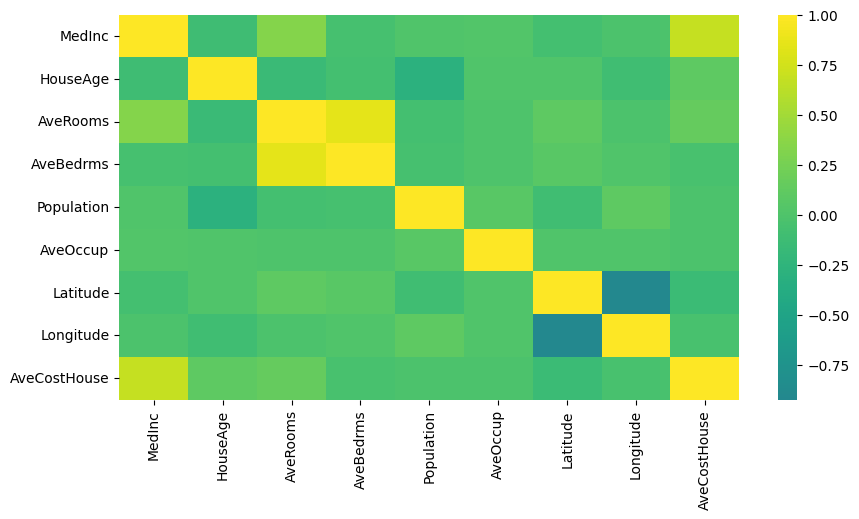

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(data=data.corr(), cmap="viridis", center=-0.8)

In [3]:
data.describe()
data = data.drop(data[data["AveCostHouse"].max() == data["AveCostHouse"]].index)

In [4]:
from sklearn.model_selection import train_test_split
X = data.drop(columns="AveCostHouse")
y = data["AveCostHouse"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Используя библиотеку Yellowbrick построим диаграммы признаков в зависимости от их относительной (в процентах от максимума) важности для
моделей линейной регрессии и регрессии эластичной сети

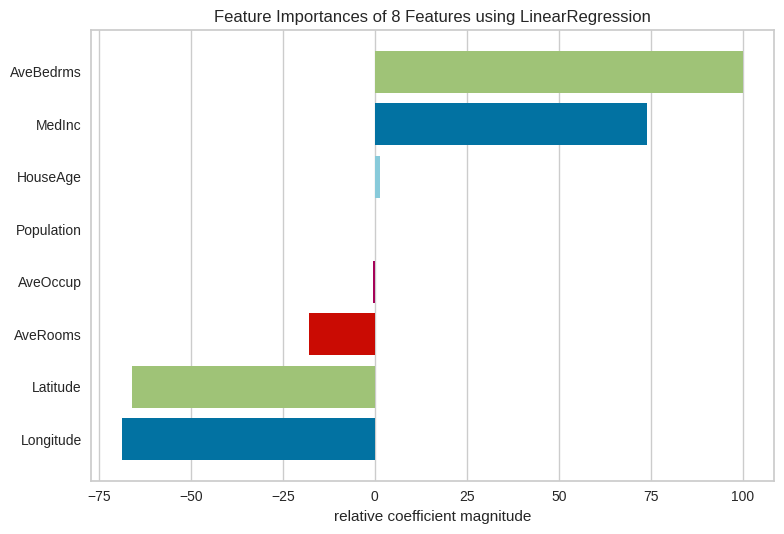

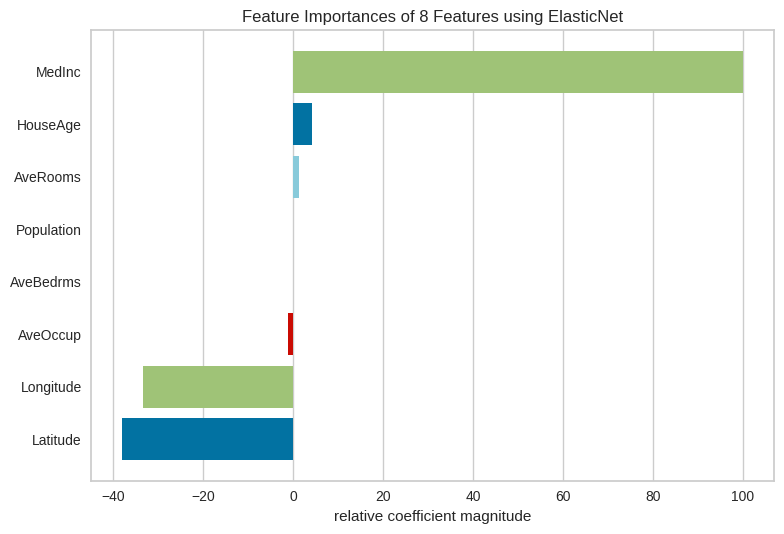

<Axes: title={'center': 'Feature Importances of 8 Features using ElasticNet'}, xlabel='relative coefficient magnitude'>

In [5]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import LinearRegression , ElasticNet
viz = FeatureImportances(LinearRegression (), labels=X.columns)
viz.fit(X_train, y_train)
viz.show()
viz = FeatureImportances(ElasticNet(l1_ratio =0.01), labels=X.columns)
viz.fit(X_train, y_train)
viz.show()

На основании диаграммы для работы модели линейной регрессии отбираем 5 наиболее важных признаков: Медианный доход, Среднее количество
комнат, Среднее количество спален, Широта, Долгота

Для работы модели регрессии эластичной сети можно использовать 3 признака: Медианный доход, Широта, Долгота

In [6]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=["AveCostHouse", "Population", "AveOccup"])
y = data["AveCostHouse"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

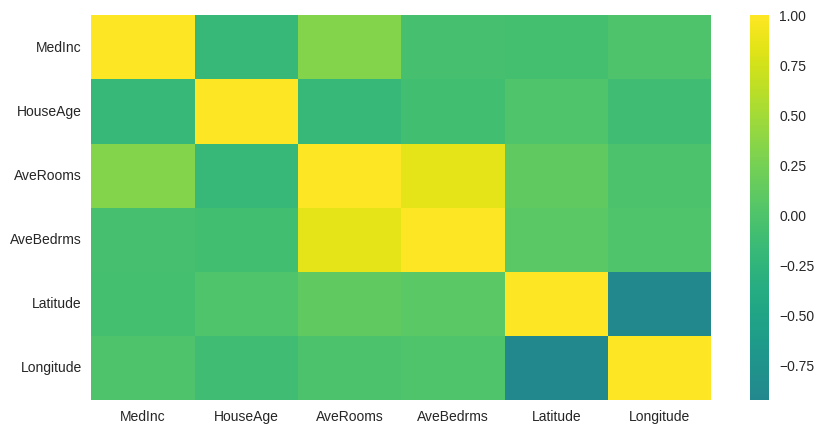

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(data=X.corr(), cmap="viridis", center=-0.8)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

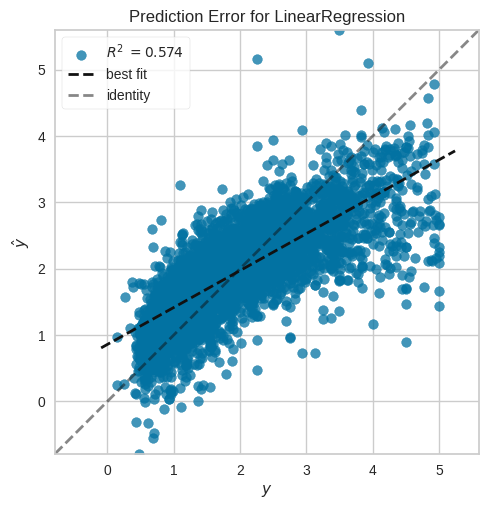

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [9]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNetCV
from yellowbrick.regressor import PredictionError
model = LinearRegression ()
viz = PredictionError(model)
viz.fit(X_train_std , y_train )
viz.score(X_test_std, y_test )
viz.show()

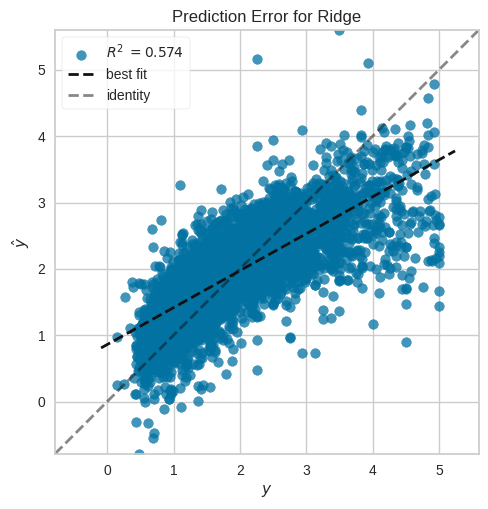

<Axes: title={'center': 'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [10]:
model = Ridge (alpha=0.5)
viz = PredictionError(model)
viz.fit(X_train_std , y_train )
viz.score(X_test_std, y_test )
viz.show()

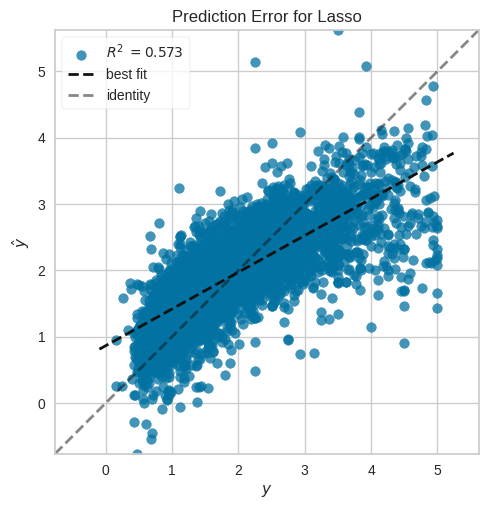

<Axes: title={'center': 'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [11]:
model = Lasso (alpha=0.001)
viz = PredictionError(model)
viz.fit(X_train_std , y_train )
viz.score(X_test_std, y_test )
viz.show()

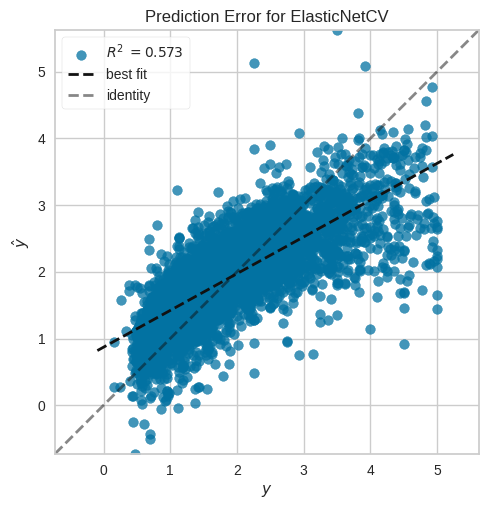

<Axes: title={'center': 'Prediction Error for ElasticNetCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [12]:
model = ElasticNetCV(l1_ratio =0.5)
viz = PredictionError(model)
viz.fit(X_train_std , y_train )
viz.score(X_test_std, y_test )
viz.show()

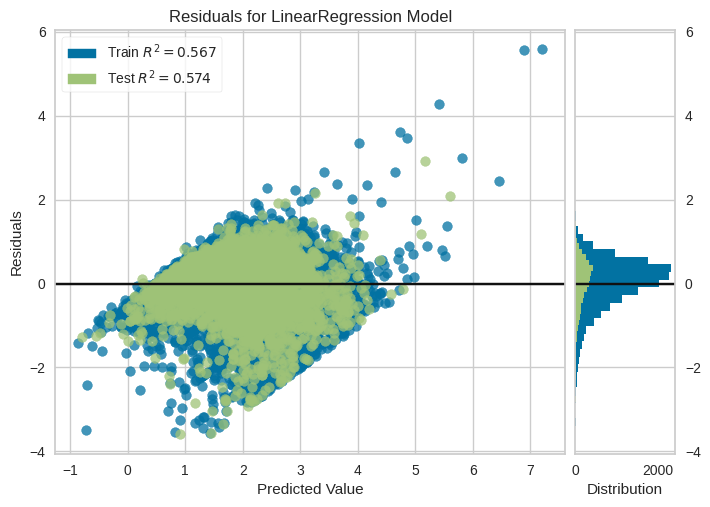

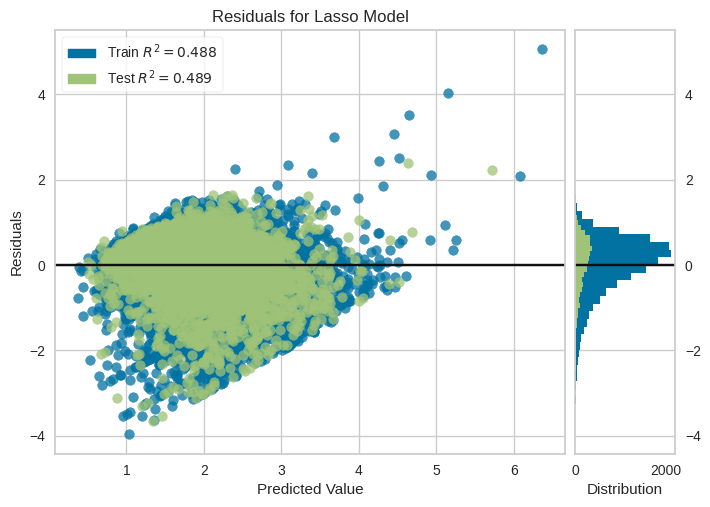

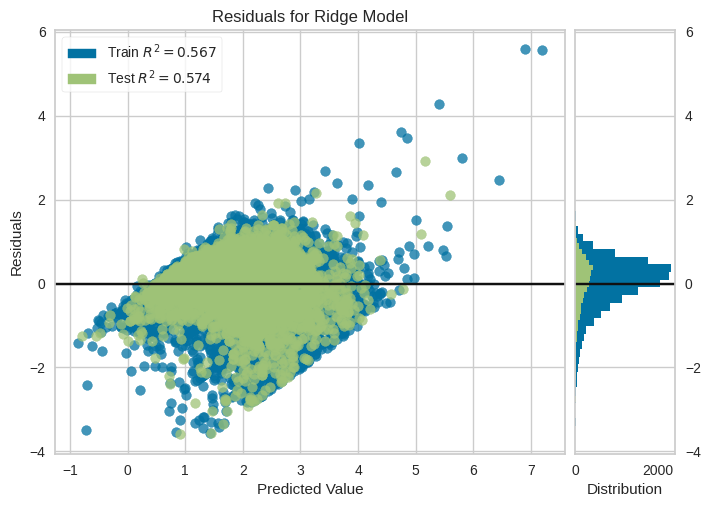

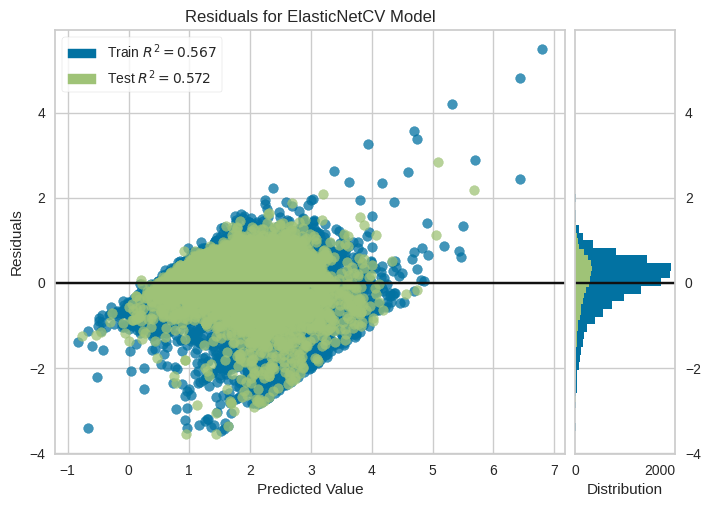

<Axes: title={'center': 'Residuals for ElasticNetCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [13]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNetCV
from yellowbrick.regressor import ResidualsPlot
viz = ResidualsPlot(LinearRegression ())
viz.fit(X_train , y_train )
viz.score(X_test , y_test )
viz.show()
viz = ResidualsPlot(Lasso(alpha =0.1, fit_intercept=True))
viz.fit(X_train , y_train )
viz.score(X_test , y_test )
viz.show()
viz = ResidualsPlot(Ridge(alpha =1.0, fit_intercept=True))
viz.fit(X_train , y_train )
viz.score(X_test , y_test )
viz.show()
viz = ResidualsPlot(ElasticNetCV ())
viz.fit(X_train , y_train )
viz.score(X_test , y_test )
viz.show()

Ну вообще не очень остатки тут распределены. Все таки данные линейно не очень хорошо описываются. Остатки должны на всем промежутке равномерно раскиданы. А тут по краям остатки очень сужены и смещены.

Должно быть так: 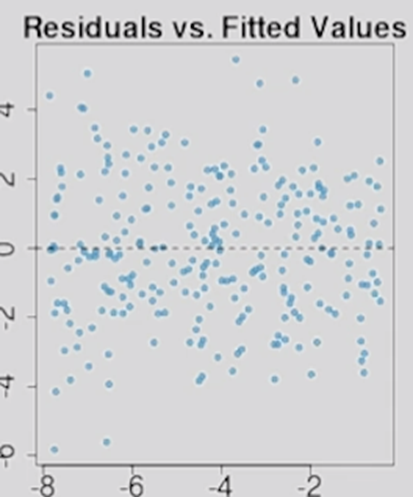

Ладно, давайте все таки посчитаем метрики качества

In [14]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
from sklearn.linear_model import Ridge , RidgeCV , Lasso , LassoCV , ElasticNet , ElasticNetCV
import numpy as np
def print_metrics(RMSE, MAE, R2, name):
  print(f"Results for {name}")
  print("RMSE =", RMSE)
  print("MAE =", MAE)
  print("R2 =", R2)

In [15]:
alphasR = np.linspace (0.1, 10.0, num =1000)
modelRidgeCV = RidgeCV(alphas=alphasR)
modelRidgeCV.fit(X_train_std , y_train)
yRCV = modelRidgeCV.predict(X_test_std)
RMSE_RidgeCV = mean_squared_error(y_test , yRCV , squared=False)
MAE_RidgeCV= mean_absolute_error(y_test , yRCV)
R2_RiddgeCV = r2_score(y_test , yRCV)
print_metrics(RMSE_RidgeCV, MAE_RidgeCV, R2_RiddgeCV, "RidgeCV")

Results for RidgeCV
RMSE = 0.652037992200427
MAE = 0.49052924516634583
R2 = 0.57360931893415


In [16]:
alphasL = np.linspace (0.1, 2.0, num =1000)
modelLassoCV = LassoCV(cv=5, random_state =0)
modelLassoCV.fit(X_train_std , y_train)
yLCV = modelLassoCV.predict(X_test_std)
RMSE_LassoCV = mean_squared_error(y_test , yLCV , squared=False)
MAE_LassoCV= mean_absolute_error(y_test , yLCV)
R2_LassoCV = r2_score(y_test , yLCV)
print_metrics(RMSE_LassoCV, MAE_LassoCV, R2_LassoCV, "LassoCV")

Results for LassoCV
RMSE = 0.652791448927946
MAE = 0.4912207470264326
R2 = 0.5726233256343056


In [17]:
modelElastCV = ElasticNetCV(cv=5, random_state =0)
modelElastCV.fit(X_train_std , y_train)
yECV = modelElastCV.predict(X_test_std)
RMSE_ElastCV = mean_squared_error(y_test , yECV , squared=False)
MAE_ElastCV = mean_absolute_error(y_test , yECV)
R2_ElastCV = r2_score(y_test , yECV)
print_metrics(RMSE_ElastCV, MAE_ElastCV, R2_ElastCV, "modelElastCV")

Results for modelElastCV
RMSE = 0.6526547181573443
MAE = 0.49109600300411665
R2 = 0.5728023396893942


Давайте же посмотрим как можно визуализировать подбор гиперпараметров для линейной регрессии

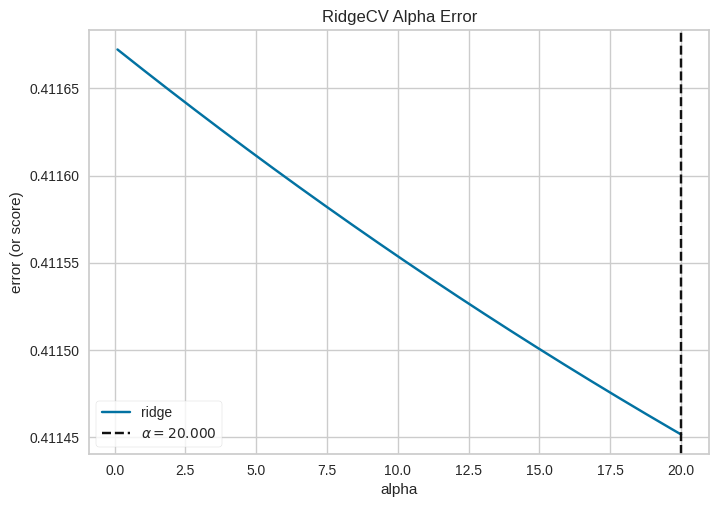

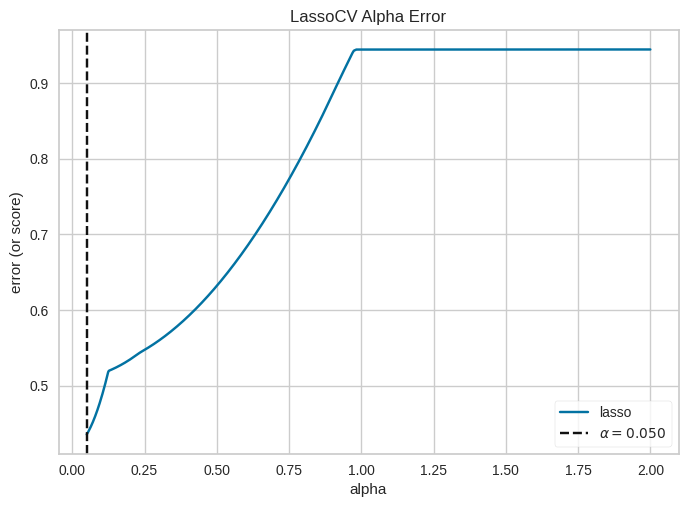

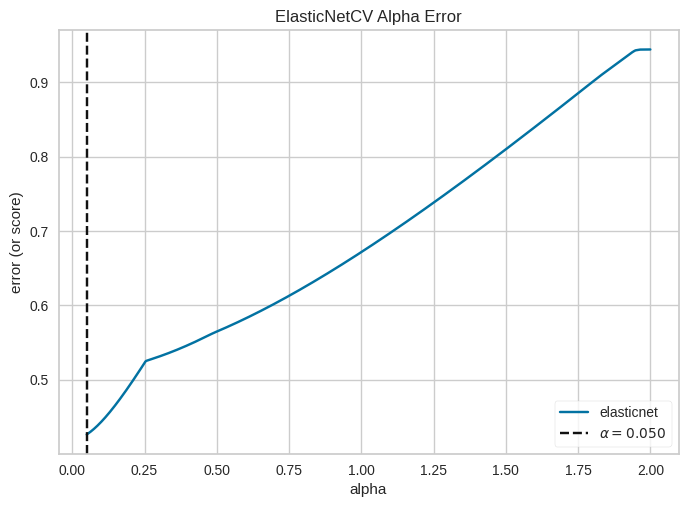

<Axes: title={'center': 'ElasticNetCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [18]:
from yellowbrick.regressor import AlphaSelection
# RidgeCV
modelR = RidgeCV(alphas=np.linspace (0.1, 20.0, num =1000))
vizR = AlphaSelection(modelR)
vizR.fit(X_train , y_train )
vizR.show()
# LassoCV
modelL = LassoCV(alphas=np.linspace (0.05, 2.0, num =1000))
vizL = AlphaSelection(modelL)
vizL.fit(X_train , y_train )
vizL.show()
# ElasticNetCV
modelE = ElasticNetCV(alphas=np.linspace (0.05, 2.0, num =1000))
vizE = AlphaSelection(modelE)
vizE.fit(X_train , y_train )
vizE.show()

Давайте проверим мою теорию, что данные не очень линейно разделимы

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
RMSE_Poly = mean_squared_error(y_test , y_pred , squared=False)
MAE_Poly = mean_absolute_error(y_test , y_pred)
R2_Poly = r2_score(y_test , y_pred)
print_metrics(RMSE_Poly, MAE_Poly, R2_Poly, "PolynomialRegression")

Results for PolynomialRegression
RMSE = 0.6260946134960044
MAE = 0.45324024315592465
R2 = 0.606864885472846


Стало получше, но не супер

Попробуем модели из классификации, которые могут предсказывать нелинейные зависимости

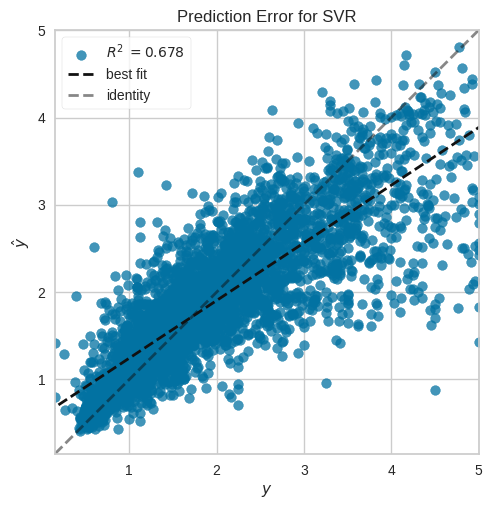

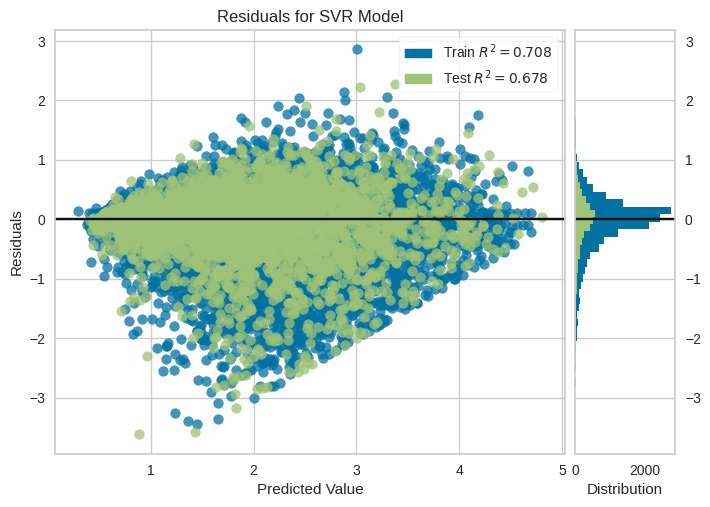

<Axes: title={'center': 'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [20]:
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from sklearn.svm import SVR
viz1 = PredictionError(SVR(kernel='rbf', gamma =0.7))
viz1.fit(X_train_std , y_train )
viz1.score(X_test_std , y_test )
viz1.show()
viz2 = ResidualsPlot(SVR(kernel='rbf', gamma =0.7))
viz2.fit(X_train_std , y_train )
viz2.score(X_test_std , y_test )
viz2.show()

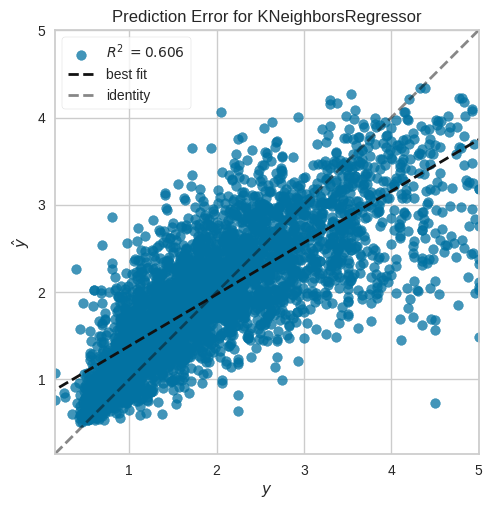

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


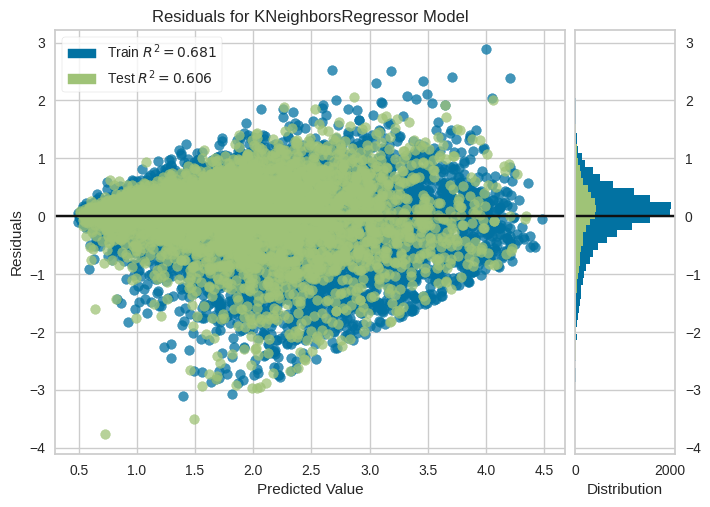

<Axes: title={'center': 'Residuals for KNeighborsRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [21]:
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors =10)
viz1 = PredictionError(knn)
viz1.fit(X_train , y_train )
viz1.score(X_test , y_test )
viz1.show()
viz2 = ResidualsPlot(knn)
viz2.fit(X_train , y_train )
viz2.score(X_test , y_test )
viz2.show()

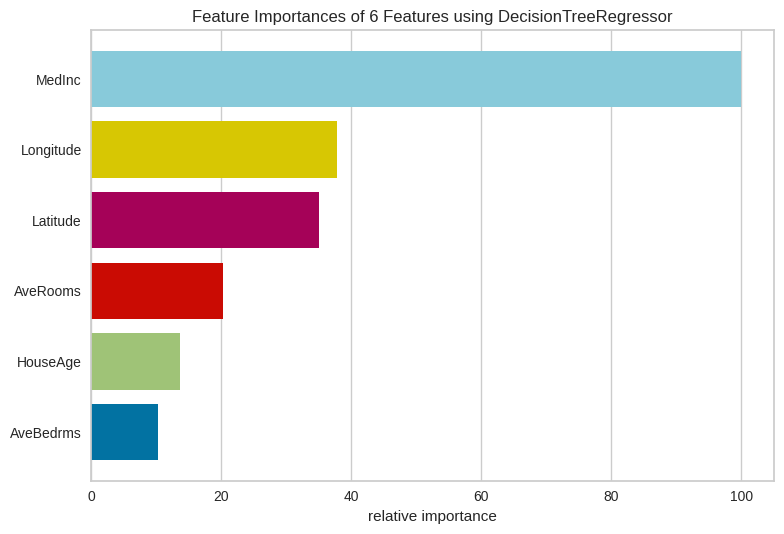

<Axes: title={'center': 'Feature Importances of 6 Features using DecisionTreeRegressor'}, xlabel='relative importance'>

In [23]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.tree import DecisionTreeRegressor
viz = FeatureImportances(DecisionTreeRegressor(), labels=X.columns)
viz.fit(X, y)
viz.show()

Рекурсивное исключение признаков (Recursive feature exclusion, RFE) — процесс выбора признаков, который уменьшает сложность модели за счет
выбора важных признаков и удаления более слабых.
В процессе отбора эти менее важные признаки исключаются один за другим, пока не будет достигнуто оптимальное количество, необходимое для
обеспечения максимальной эффективности модели.
i По сравнению с выбором признаков методами Лассо или Random Forest метод имеет преимущество: он учитывает повторные корректировки
важности признаков после удаления признака (признаков).
Таким образом, он лучше подходит для оценки признаков, которые сильно коррелируют.
i RFE требует больше вычислительных затрат, чем данные методы.

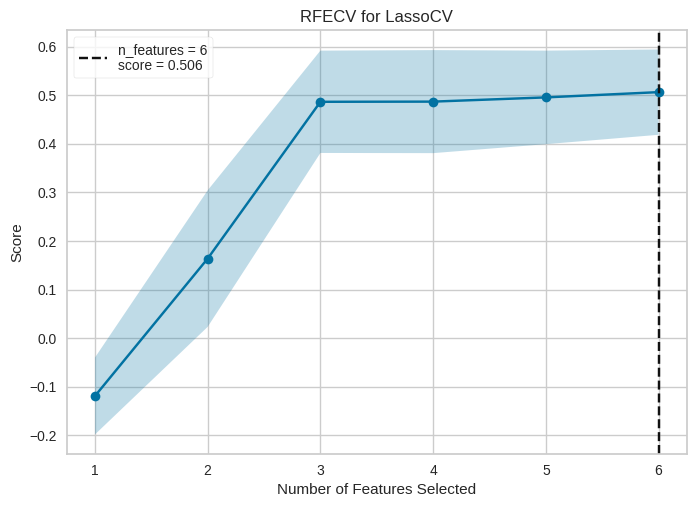

<Axes: title={'center': 'RFECV for LassoCV'}, xlabel='Number of Features Selected', ylabel='Score'>

In [25]:
from yellowbrick.model_selection import RFECV
from sklearn.linear_model import LassoCV
visualizer = RFECV(LassoCV())
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [26]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=["AveCostHouse", "Population", "AveOccup", "AveBedrms", "HouseAge"])
y = data["AveCostHouse"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

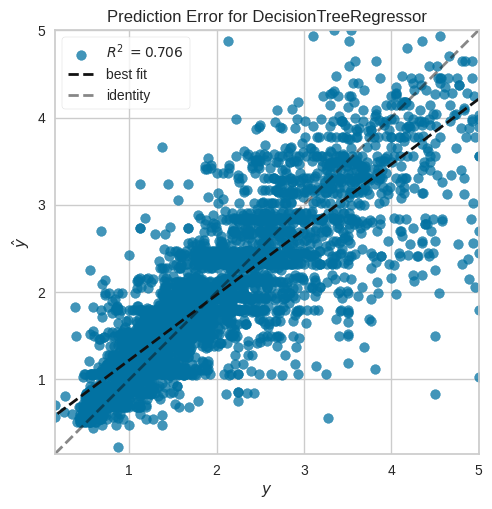

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


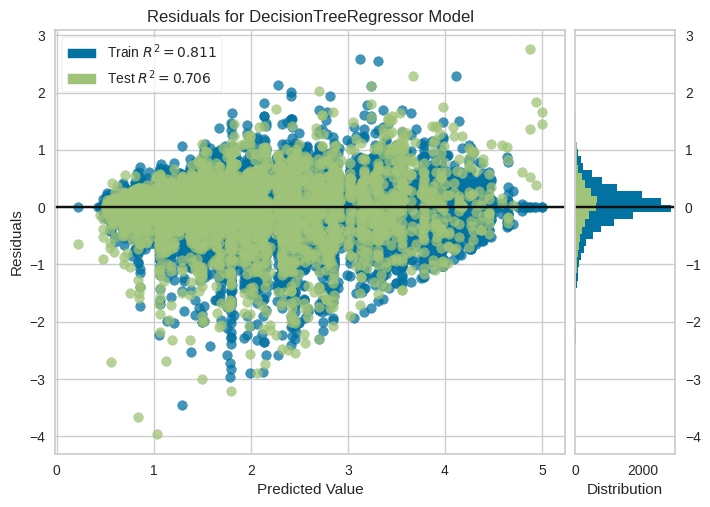

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [27]:
cart = DecisionTreeRegressor(max_depth=10)
viz1 = PredictionError(cart)
viz1.fit(X_train , y_train )
viz1.score(X_test , y_test )
viz1.show()
viz2 = ResidualsPlot(cart)
viz2.fit(X_train , y_train )
viz2.score(X_test , y_test )
viz2.show()

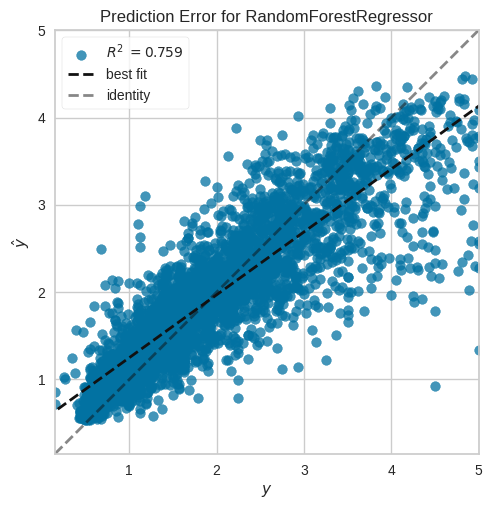

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


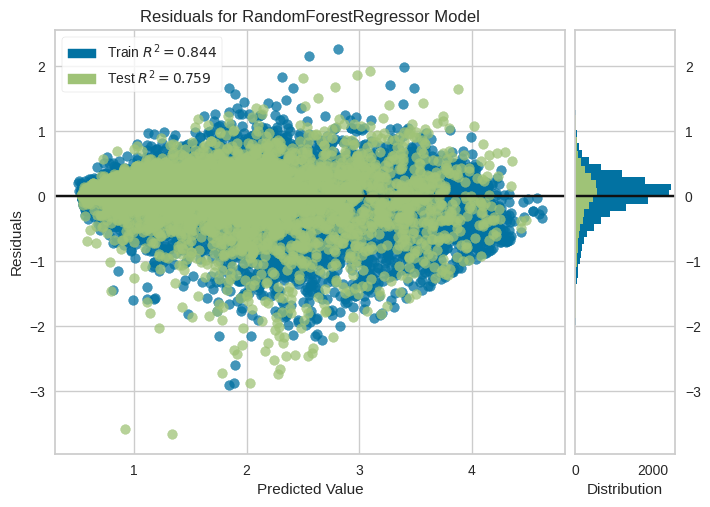

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=150, max_depth=10)
viz1 = PredictionError(rf)
viz1.fit(X_train , y_train )
viz1.score(X_test , y_test )
viz1.show()
viz2 = ResidualsPlot(rf)
viz2.fit(X_train , y_train )
viz2.score(X_test , y_test )
viz2.show()